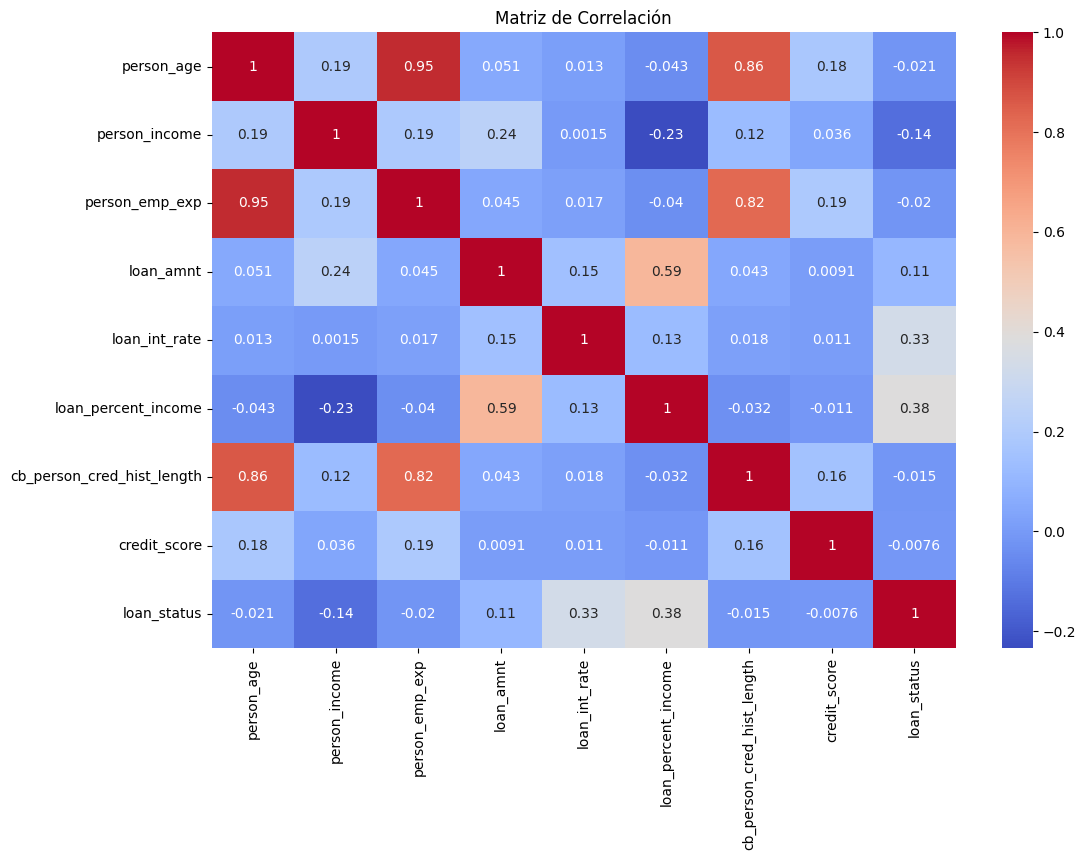

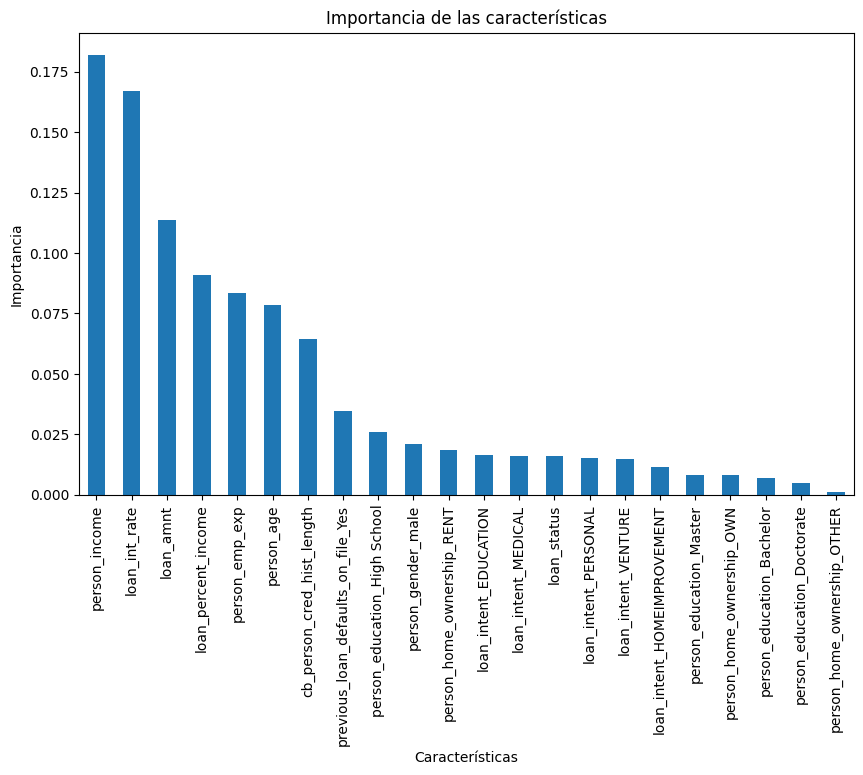

c:\Users\pepeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.1862 - mean_absolute_error: 0.9294 - val_loss: 1.1474 - val_mean_absolute_error: 0.1208
Epoch 2/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0211 - mean_absolute_error: 0.1629 - val_loss: 0.5822 - val_mean_absolute_error: 0.0886
Epoch 3/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4798 - mean_absolute_error: 0.0888 - val_loss: 0.2345 - val_mean_absolute_error: 0.0858
Epoch 4/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1855 - mean_absolute_error: 0.0870 - val_loss: 0.0800 - val_mean_absolute_error: 0.0860
Epoch 5/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0626 - mean_absolute_error: 0.0857 - val_loss: 0.0284 - val_mean_absolute_error: 0.0844
Epoch 6/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0848 - val_loss: 0.0148 - val_mean_absolute_error: 0.0849
Epoch 7/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0

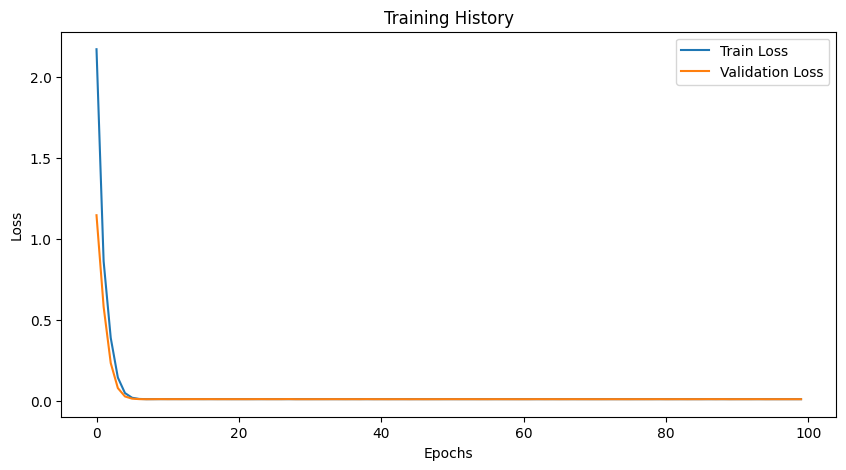

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('C:/Users/pepeb/Documents/EDEM_IA_MASTER/EDEM_IA_PROJECT_2/dataset.csv')

# Análisis de correlación para identificar posibles dependencias excesivas
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Identificar las columnas categóricas y aplicar one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Escalar las columnas numéricas con MinMaxScaler
numeric_columns = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns]) 

# Separar las características y la variable objetivo
X = df.drop(columns=['credit_score'])
y = df['credit_score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Análisis de importancia de características con RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

# Definir el modelo optimizado con más dropout y regularización
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

# Graficar el historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [35]:

from sklearn.metrics import mean_absolute_error, r2_score
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar el MAE y R^2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Mostrar algunas predicciones junto con los valores reales
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head(10))

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 0.08609271099979175
R^2 Score: 0.08460537564794379
         Actual  Predicted
37979  0.458696   0.558153
9911   0.558696   0.495112
43386  0.697826   0.539100
13822  0.450000   0.506867
44810  0.426087   0.526780
18495  0.606522   0.560305
25555  0.608696   0.500598
13316  0.517391   0.532680
12929  0.434783   0.503240
28374  0.613043   0.538992


In [ ]:
# Supongamos que estas son las características del dataset (ajusta estos nombres según tu dataset)
# Por ejemplo, si tienes columnas como: ['age', 'income', 'employment_type', ...] deberás ajustarlo
features = X.columns.tolist()  # Asegúrate de poner las características correctas

# Solicitar las entradas del usuario
print("Introduce los valores de las siguientes características:")
user_input = []
for feature in features:
    value = float(input(f"Ingrese el valor para {feature}: "))
    user_input.append(value)

# Convertir la entrada en un DataFrame para que sea compatible con el modelo
user_input_df = pd.DataFrame([user_input], columns=features)

# Normalizar los datos de entrada
user_input_scaled = scaler.transform(user_input_df)  # Usa el mismo scaler que utilizaste para los datos de entrenamiento

# Hacer la predicción con el modelo entrenado
predicted_credit_score = model.predict(user_input_scaled)

print(f"El puntaje de crédito predicho es: {predicted_credit_score[0]:.2f}")

Introduce los valores de las siguientes características:
